In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("WIPRO_stock_dataset.csv")

In [45]:
df.head

<bound method NDFrame.head of             Date Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03  WIPRO     EQ     2522.40  2724.00  2724.20  2724.00   
1     2000-01-04  WIPRO     EQ     2724.20  2942.15  2942.15  2942.15   
2     2000-01-05  WIPRO     EQ     2942.15  2942.15  3177.55  2715.00   
3     2000-01-06  WIPRO     EQ     2990.10  3144.70  3183.00  2790.00   
4     2000-01-07  WIPRO     EQ     2932.25  2751.00  2751.00  2697.70   
...          ...    ...    ...         ...      ...      ...      ...   
5301  2021-04-26  WIPRO     EQ      475.70   479.40   483.85   477.00   
5302  2021-04-27  WIPRO     EQ      480.30   481.40   487.00   481.00   
5303  2021-04-28  WIPRO     EQ      485.05   485.85   493.20   481.25   
5304  2021-04-29  WIPRO     EQ      489.30   492.70   492.80   485.70   
5305  2021-04-30  WIPRO     EQ      489.85   491.50   511.80   489.30   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0     2724.20  2724.20  

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [47]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,754.857303,756.799981,772.478364,738.150886,754.522418,754.474783,755.165515,2.236123e+06,1.024537e+14,48112.935668,9.957321e+05,0.459096
std,794.521897,803.371567,825.259513,768.613272,794.383479,794.159260,795.825682,4.827183e+06,1.741585e+14,46662.502048,1.324731e+06,0.185192
min,162.350000,163.100000,171.350000,159.400000,161.800000,162.350000,166.440000,1.003000e+03,4.355942e+11,692.000000,8.242000e+03,0.036400
25%,380.525000,380.575000,386.900000,374.475000,380.612500,380.525000,380.480000,6.937025e+05,4.319006e+13,25021.000000,3.023500e+05,0.332100
50%,503.400000,504.000000,510.800000,494.500000,503.800000,503.250000,503.450000,1.152270e+06,6.579357e+13,36659.500000,6.432110e+05,0.483000
75%,679.225000,680.000000,690.887500,670.812500,679.925000,678.687500,680.795000,2.004576e+06,1.075259e+14,55772.750000,1.197829e+06,0.596700
max,9587.450000,10350.000000,10350.000000,8928.350000,9640.000000,9587.450000,9607.140000,1.303677e+08,5.075003e+15,793471.000000,3.554140e+07,0.939400


In [48]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

In [49]:
Scaled_range = MinMaxScaler(feature_range=(0, 1))
scaled_data = Scaled_range.fit_transform(dataset)

In [50]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

In [51]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

In [52]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [54]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [55]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4185/4185 [==============================] - 58s 14ms/step - loss: 8.6883e-05
Epoch 2/5
4185/4185 [==============================] - 58s 14ms/step - loss: 8.0483e-05
Epoch 3/5
4185/4185 [==============================] - 63s 15ms/step - loss: 5.8602e-05
Epoch 4/5
4185/4185 [==============================] - 61s 15ms/step - loss: 5.4262e-05
Epoch 5/5
4185/4185 [==============================] - 61s 15ms/step - loss: 5.1356e-05


In [66]:
tested_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(tested_data)):
    x_test.append(tested_data[i - 60:i, 0])

In [75]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
#predictions = Scale.inverse_transform(predictions)

34/34 [==============================] - 0s 10ms/step


In [68]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 313.3700451775518


C:\Users\anand\AppData\Local\Temp\ipykernel_5736\90838933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


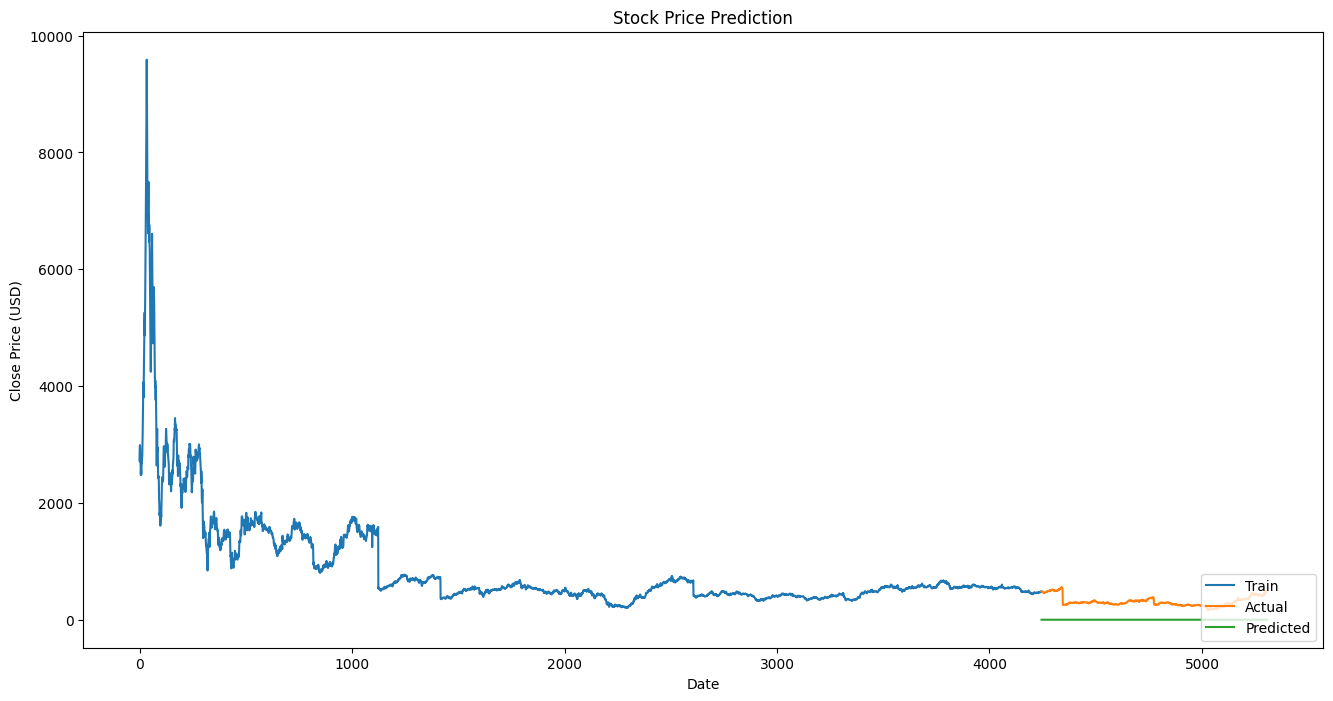

In [69]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()